# "Linear Regression for R_t (difference) for Indian States"
> "Linear Regression for R_t (difference) for Indian States"

- toc: true
- branch: master
- badges: true
- comments: true
- author: Ashutosh Sanzgiri
- categories: [covid]

We run a linear regression for the difference in R_t for 15 states in India over a period from April 2nd and May 9th. The endogenous variable is the difference in Rt. The exogenous variables are difference in Covid19 testing rates, the Human Development Index for the state, the Governance Index for the state and the per Capita Health Care Expenditure in the state.

In [1]:
#!pip install statsmodels

In [2]:
import pandas as pd
import statsmodels.api as sm

#### Load india_state_data worksheet

In [3]:
ind_data = pd.read_csv('india_state_data.csv')

In [4]:
ind_data = ind_data.rename(columns={'diff': 'rt_diff', 'testing2ndapr':'test1', 'test 9may': 'test2'})
ind_data['test_diff'] = ind_data['test2'] - ind_data['test1']

In [5]:
ind_data.head()

,States,Rt2ndapril,Rt9may,rt_diff,test1,test2,test diff,log(test diff),hdi,governance,pche,interaction,test_diff
0,AP,2.18,0.98,1.20,21,3121,3100,8.039,0.650,5.05,1013,5.225349,3100
1,BR,1.72,1.10,0.62,25,286,261,5.565,0.576,4.40,491,3.205440,261
2,DL,2.05,1.12,0.93,143,4591,4448,8.400,0.746,5.62,1992,6.266400,4448
3,GJ,1.35,1.06,0.29,66,1716,1650,7.409,0.672,5.04,1189,4.978848,1650
4,HR,1.96,1.15,0.81,48,1945,1897,7.548,0.708,5.00,1119,5.343984,1897


In [6]:
ind_data2 = ind_data[['rt_diff', 'test_diff', 'hdi', 'governance', 'pche']].copy()
ind_data2.columns

Index(['rt_diff', 'test_diff', 'hdi', 'governance', 'pche'], dtype='object')

In [7]:
ind_data2.head()

,rt_diff,test_diff,hdi,governance,pche
0,1.20,3100,0.650,5.05,1013
1,0.62,261,0.576,4.40,491
2,0.93,4448,0.746,5.62,1992
3,0.29,1650,0.672,5.04,1189
4,0.81,1897,0.708,5.00,1119


### MinMax Normalization of all columns

In [8]:
for c in ind_data2.columns.values:
    mmin = ind_data2[c].min()
    mmax = ind_data2[c].max()
    ind_data2[c] = (ind_data2[c] - mmin) / (mmax-mmin)

In [9]:
y = ind_data2.rt_diff.values
X = ind_data2[['test_diff', 'hdi', 'governance', 'pche']]

In [10]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.732
Model:                            OLS   Adj. R-squared (uncentered):              0.634
Method:                 Least Squares   F-statistic:                              7.505
Date:                Thu, 07 Apr 2022   Prob (F-statistic):                     0.00361
Time:                        03:45:54   Log-Likelihood:                        -0.89814
No. Observations:                  15   AIC:                                      9.796
Df Residuals:                      11   BIC:                                      12.63
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/opt/hostedtoolcache/Python/3.6.15/x64/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


### Add Interaction Term

In [11]:
ind_data2['xterm'] = ind_data2['test_diff']*ind_data2['hdi']

In [12]:
X = ind_data2[['test_diff', 'hdi', 'governance', 'pche', 'xterm']]

In [13]:
model2 = sm.OLS(y, X)
results2 = model2.fit()
print(results2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.760
Model:                            OLS   Adj. R-squared (uncentered):              0.640
Method:                 Least Squares   F-statistic:                              6.340
Date:                Thu, 07 Apr 2022   Prob (F-statistic):                     0.00666
Time:                        03:45:54   Log-Likelihood:                       -0.060217
No. Observations:                  15   AIC:                                      10.12
Df Residuals:                      10   BIC:                                      13.66
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/opt/hostedtoolcache/Python/3.6.15/x64/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


### Misc Analysis

In [14]:
sm.stats.linear_rainbow(results)

(1.56889693867147, 0.38823518172143395)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


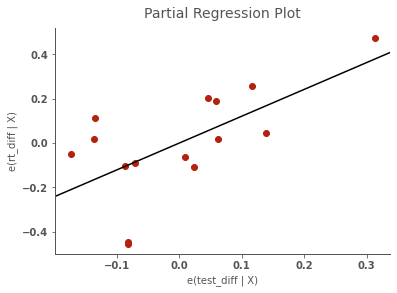

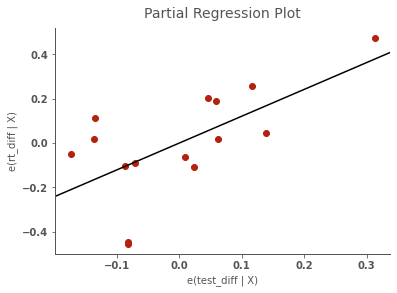

In [15]:
sm.graphics.plot_partregress('rt_diff', 'test_diff', ['hdi', 'governance', 'pche'], data=ind_data2, obs_labels=False)

In [16]:
model = sm.OLS(y, X)
results = model.fit_regularized(L1_wt=0.0)
print(results.params)

[ 1.29155843 -0.22758562  0.58588266 -0.2638172  -1.04244082]
